In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [3]:
df_movies= pd.read_csv("../data/ml-latest/movies.csv", usecols= ["movieId", "title"], dtype= {"movieId": "int32", "title": "str"})
df_ratings= pd.read_csv("../data/ml-latest/ratings.csv", usecols= ["userId", "movieId", "rating"], dtype= {"userId": "int32", "movieId": "int32", "rating": "float32"})

In [4]:
df_movies.describe()

,movieId
count,86537.000000
mean,155932.817096
std,78037.145347
min,1.000000
25%,111443.000000
50%,164574.000000
75%,211225.000000
max,288983.000000


In [5]:
df_ratings.describe()

,userId,movieId,rating
count,3.383216e+07,3.383216e+07,3.383216e+07
mean,1.654380e+05,2.831348e+04,3.542545e+00
std,9.534122e+04,4.992865e+04,1.063959e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,8.295300e+04,1.219000e+03,3.000000e+00
50%,1.661290e+05,3.263000e+03,4.000000e+00
75%,2.474500e+05,4.049100e+04,4.000000e+00
max,3.309750e+05,2.889830e+05,5.000000e+00


In [6]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 387.2 MB


In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int32 
 1   title    86537 non-null  object
dtypes: int32(1), object(1)
memory usage: 1014.2+ KB


In [8]:
print(df_ratings['userId'].max(), df_ratings['movieId'].max())


330975 288983


In [9]:
df_movies.head(10)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [10]:
df_ratings.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
5,1,381,3.5
6,1,596,4.0
7,1,1036,5.0
8,1,1049,3.0
9,1,1066,4.0


## 1.1B)

In [11]:
"""Top ten most total ratings"""
number_ratings_top10= pd.DataFrame(df_ratings.groupby("movieId")["rating"].count().sort_values(ascending=False).head(10)).rename(columns= {"rating": "rating_count"})
number_ratings_top10

,rating_count
movieId,
318,122296
356,113581
296,108756
2571,107056
593,101802
260,97202
2959,86207
527,84232
480,83026


In [12]:
"""Merge to df_movies"""
title_number_ratings_top10= df_movies.merge(number_ratings_top10, on= "movieId").sort_values(by="rating_count")

In [13]:
title_number_ratings_top10

,movieId,title,rating_count
7,1196,Star Wars: Episode V - The Empire Strikes Back...,80200
4,480,Jurassic Park (1993),83026
5,527,Schindler's List (1993),84232
9,2959,Fight Club (1999),86207
0,260,Star Wars: Episode IV - A New Hope (1977),97202
6,593,"Silence of the Lambs, The (1991)",101802
8,2571,"Matrix, The (1999)",107056
1,296,Pulp Fiction (1994),108756
3,356,Forrest Gump (1994),113581
2,318,"Shawshank Redemption, The (1994)",122296


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
  Text(1, 0, 'Jurassic Park (1993)'),
  Text(2, 0, "Schindler's List (1993)"),
  Text(3, 0, 'Fight Club (1999)'),
  Text(4, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(5, 0, 'Silence of the Lambs, The (1991)'),
  Text(6, 0, 'Matrix, The (1999)'),
  Text(7, 0, 'Pulp Fiction (1994)'),
  Text(8, 0, 'Forrest Gump (1994)'),
  Text(9, 0, 'Shawshank Redemption, The (1994)')])

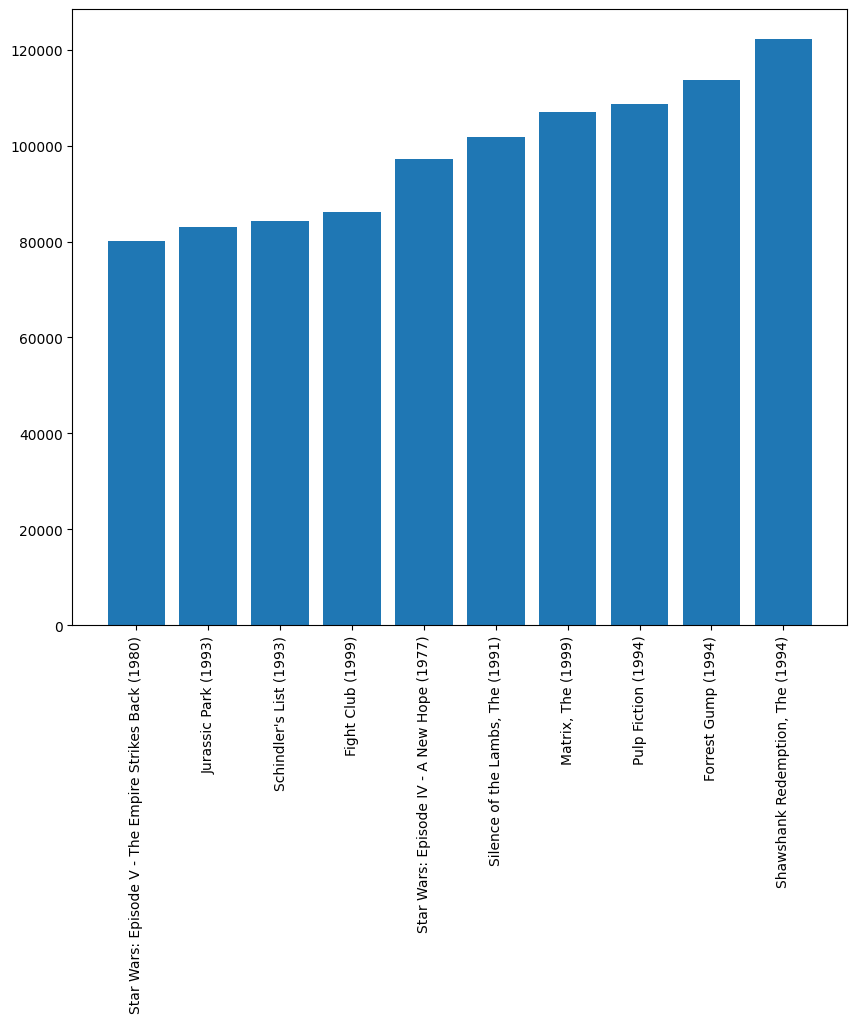

In [14]:
plt.figure(figsize= (10, 8))

plt.bar(title_number_ratings_top10["title"], title_number_ratings_top10["rating_count"])

plt.xticks(rotation= 90)

## 1.1C)

In [15]:
"""List of the movies from previous exercise"""
movieids= title_number_ratings_top10["movieId"]
movieids

7    1196
4     480
5     527
9    2959
0     260
6     593
8    2571
1     296
3     356
2     318
Name: movieId, dtype: int32

In [16]:
"""Taking out all rating data for those movies"""
top10_movie_ratings= df_ratings[df_ratings["movieId"].isin(movieids)]
top10_movie_ratings

,userId,movieId,rating
3,1,260,4.5
4,1,356,5.0
10,1,1196,3.5
26,1,2571,2.5
113,2,296,5.0
...,...,...,...
33831871,330975,480,2.5
33831877,330975,527,3.5
33831890,330975,593,3.0
33831937,330975,1196,2.5


In [17]:
"""Calculating the mean"""
top10_mean_ratings= top10_movie_ratings.groupby("movieId")["rating"].mean()
top10_mean_ratings

movieId
260     4.092401
296     4.191778
318     4.416792
356     4.068189
480     3.689013
527     4.242337
593     4.150287
1196    4.118030
2571    4.160631
2959    4.236019
Name: rating, dtype: float32

In [18]:
"""Df with id title and mean rating"""
title_mean_ratings= df_movies.merge(top10_mean_ratings, on= "movieId").rename(columns= {"rating": "mean_rating"}).sort_values(by= "mean_rating", ascending= False).set_index("movieId")

In [19]:
title_mean_ratings

,title,mean_rating
movieId,,
318,"Shawshank Redemption, The (1994)",4.416792
527,Schindler's List (1993),4.242337
2959,Fight Club (1999),4.236019
296,Pulp Fiction (1994),4.191778
2571,"Matrix, The (1999)",4.160631
593,"Silence of the Lambs, The (1991)",4.150287
1196,Star Wars: Episode V - The Empire Strikes Back...,4.118030
260,Star Wars: Episode IV - A New Hope (1977),4.092401
356,Forrest Gump (1994),4.068189


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Shawshank Redemption, The (1994)'),
  Text(1, 0, "Schindler's List (1993)"),
  Text(2, 0, 'Fight Club (1999)'),
  Text(3, 0, 'Pulp Fiction (1994)'),
  Text(4, 0, 'Matrix, The (1999)'),
  Text(5, 0, 'Silence of the Lambs, The (1991)'),
  Text(6, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
  Text(7, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(8, 0, 'Forrest Gump (1994)'),
  Text(9, 0, 'Jurassic Park (1993)')])

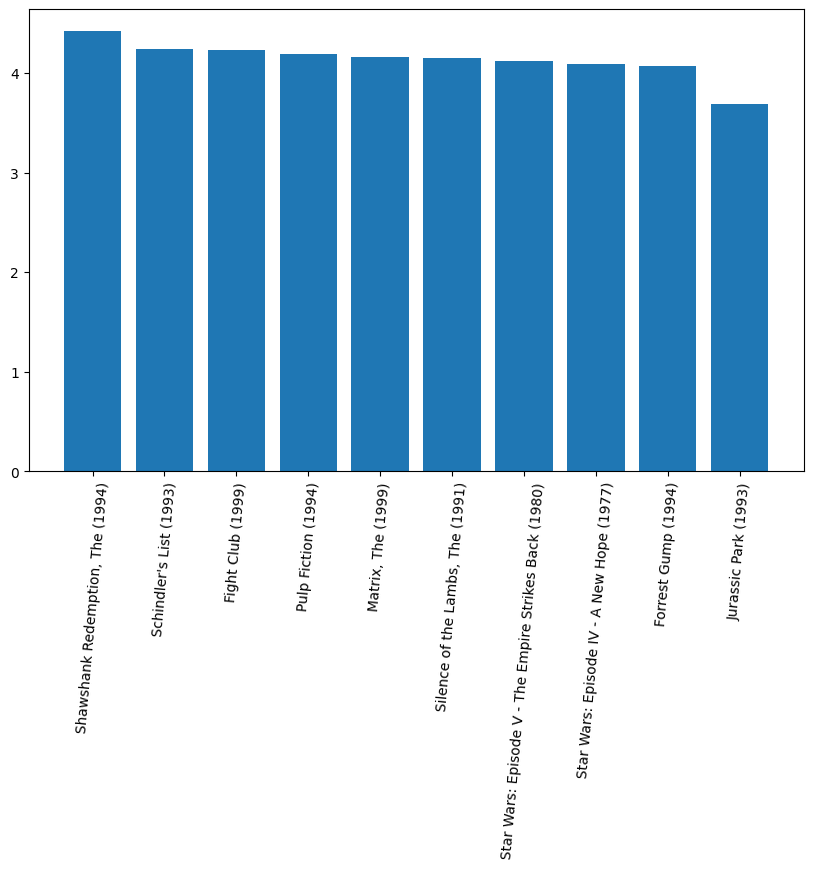

In [20]:
plt.figure(figsize= (10, 6))

plt.bar(title_mean_ratings["title"], title_mean_ratings["mean_rating"])
plt.xticks(rotation= 85)

## 1.1D)

In [21]:
"""Making a df with total movies per year"""
movie_years= df_movies["title"].str.extract(r"\((\d{4})\)")

movie_years.columns= ["year"]
movie_years["title"]= df_movies["title"]


In [22]:
total_movie_year= movie_years.groupby("year")["year"].count().reset_index(name= "count").astype(int)
total_movie_year

,year,count
0,1874,1
1,1878,2
2,1880,1
3,1882,1
4,1883,1
...,...,...
137,2019,3058
138,2020,2628
139,2021,2297
140,2022,1962


([<matplotlib.axis.XTick at 0x226c7ae7e90>,
 [Text(1870, 0, '1870'),
  Text(1870, 0, '1870'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text

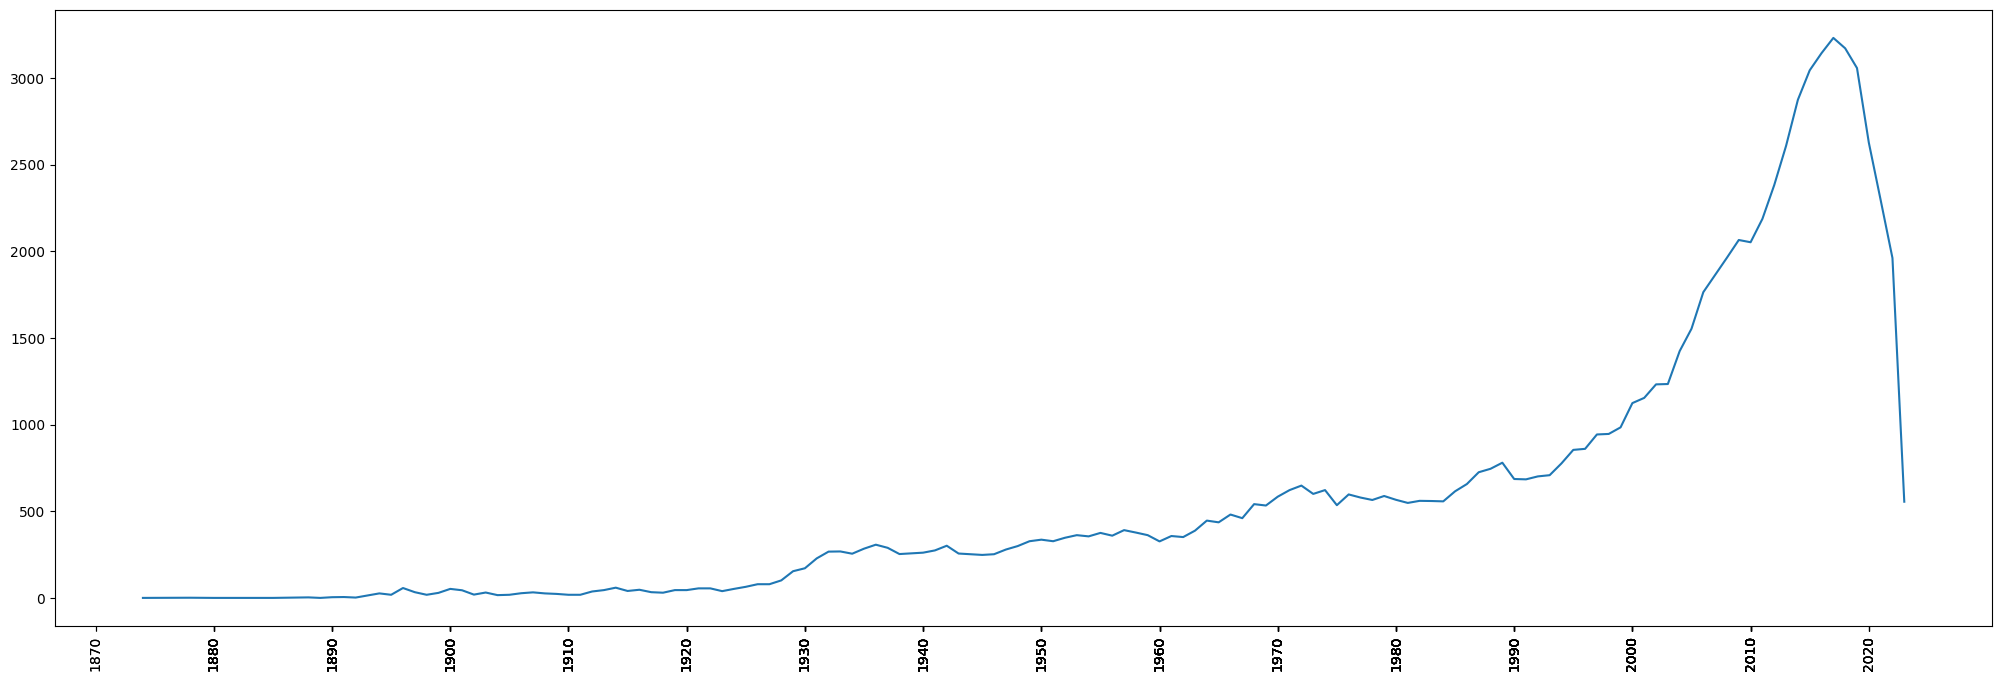

In [23]:
labels= (total_movie_year["year"]// 10)* 10

plt.figure(figsize= (25, 8))

plt.plot(total_movie_year["year"], total_movie_year["count"])

plt.xticks(rotation= 90, ticks= labels)

## 1.1E)

In [24]:
"""Made a new total ratings for practice, tail 15 all the movies made a non readable plot, could use more ids"""
number_ratings_top10= pd.DataFrame(df_ratings.groupby("movieId")["rating"].sum().sort_values(ascending=False).head(10)).rename(columns= {"rating": "rating_count"})
number_ratings_top10


rating_per_id= df_ratings.groupby("movieId")["rating"].count().sort_values().reset_index(name= "count").tail(15)
rating_per_id

,movieId,count
83224,7153,75512
83225,110,75514
83226,1210,76773
83227,1,76813
83228,4993,79940
83229,1196,80200
83230,480,83026
83231,527,84232
83232,2959,86207
83233,260,97202


<BarContainer object of 15 artists>

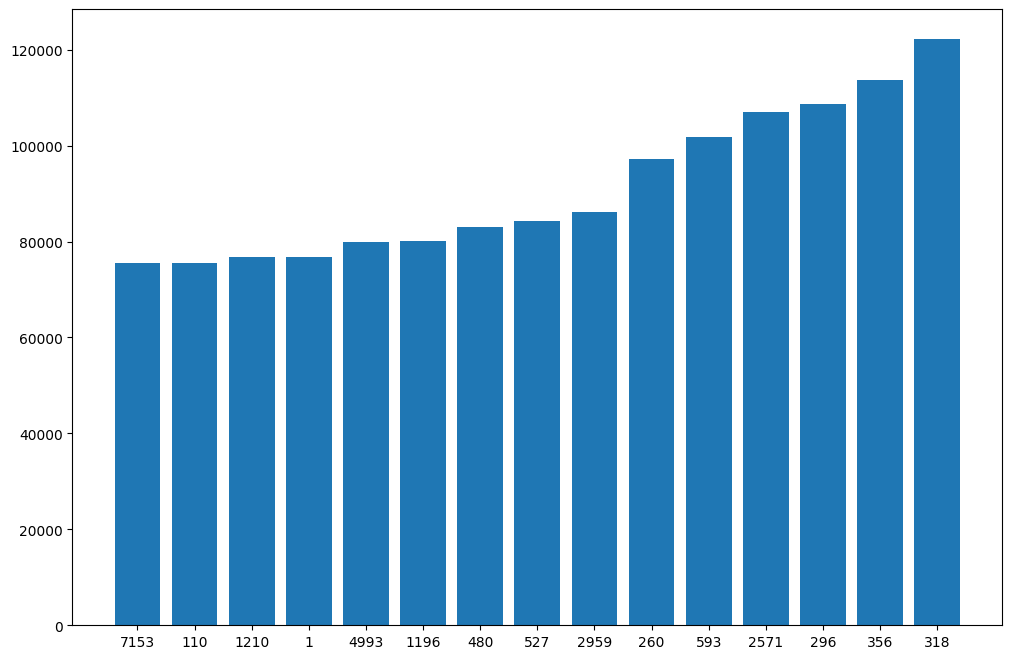

In [25]:
plt.figure(figsize= (12,8))

plt.bar(rating_per_id["movieId"].astype(str), rating_per_id["count"])

## 1.1F)

Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över
dessa.

In [26]:
df_movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
86532,288967,State of Siege: Temple Attack (2021)
86533,288971,Ouija Japan (2021)
86534,288975,The Men Who Made the Movies: Howard Hawks (1973)
86535,288977,Skinford: Death Sentence (2023)


In [27]:
df_ratings

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832157,330975,8340,2.0
33832158,330975,8493,2.5
33832159,330975,8622,4.0
33832160,330975,8665,3.0


In [28]:
"""New one for practice, instead of using previous ones"""
top10_total_ratings= df_ratings.groupby("movieId")["rating"].count().sort_values().tail(10).reset_index(name= "count")
top10_total_ratings

,movieId,count
0,1196,80200
1,480,83026
2,527,84232
3,2959,86207
4,260,97202
5,593,101802
6,2571,107056
7,296,108756
8,356,113581
9,318,122296


In [29]:
"""Merging to get title"""
title_count_ratings= top10_total_ratings.merge(df_movies, on= "movieId")
title_count_ratings

,movieId,count,title
0,1196,80200,Star Wars: Episode V - The Empire Strikes Back...
1,480,83026,Jurassic Park (1993)
2,527,84232,Schindler's List (1993)
3,2959,86207,Fight Club (1999)
4,260,97202,Star Wars: Episode IV - A New Hope (1977)
5,593,101802,"Silence of the Lambs, The (1991)"
6,2571,107056,"Matrix, The (1999)"
7,296,108756,Pulp Fiction (1994)
8,356,113581,Forrest Gump (1994)
9,318,122296,"Shawshank Redemption, The (1994)"


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
  Text(1, 0, 'Jurassic Park (1993)'),
  Text(2, 0, "Schindler's List (1993)"),
  Text(3, 0, 'Fight Club (1999)'),
  Text(4, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(5, 0, 'Silence of the Lambs, The (1991)'),
  Text(6, 0, 'Matrix, The (1999)'),
  Text(7, 0, 'Pulp Fiction (1994)'),
  Text(8, 0, 'Forrest Gump (1994)'),
  Text(9, 0, 'Shawshank Redemption, The (1994)')])

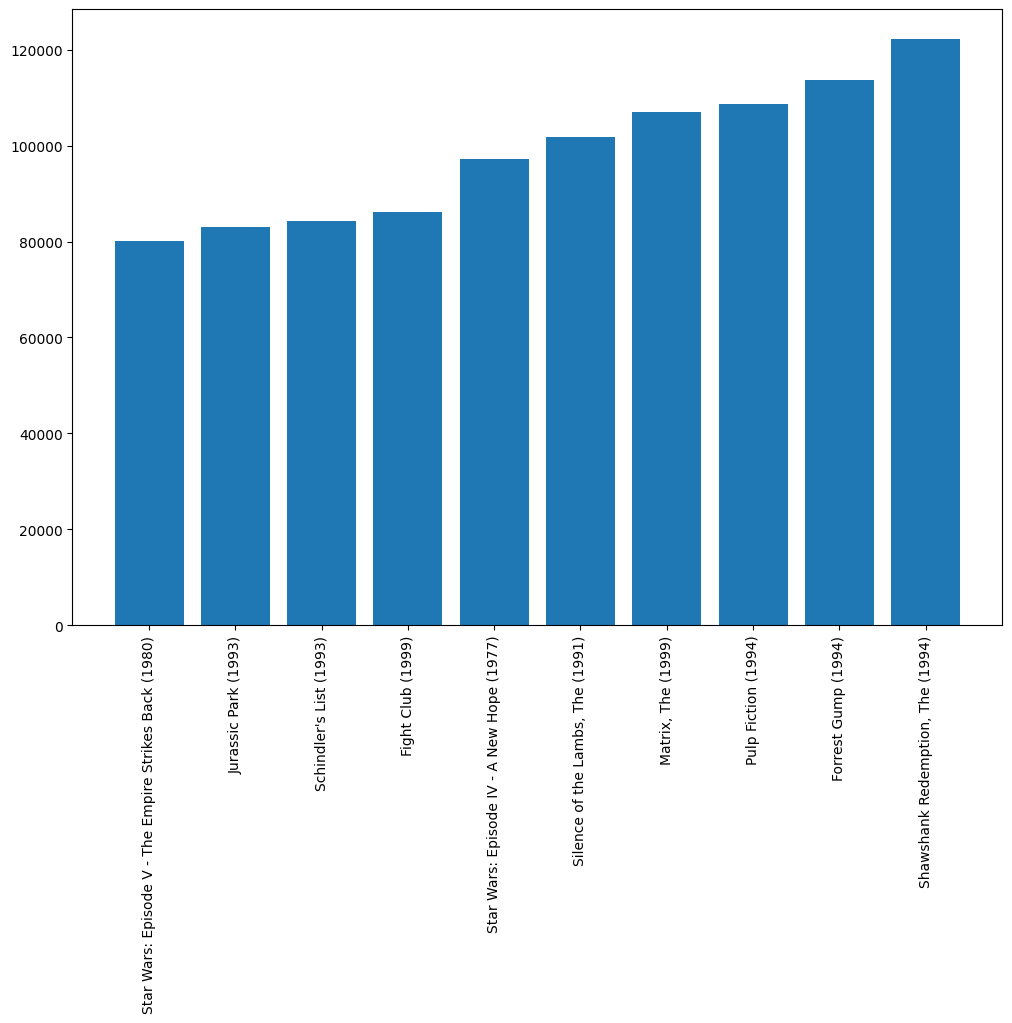

In [30]:
plt.figure(figsize= (12, 8))

plt.bar(title_count_ratings["title"], title_count_ratings["count"])
plt.xticks(rotation= 90)

## 1.2)

In [31]:
id_rating_count_check= df_ratings.groupby("movieId")["rating"].count().reset_index(name="count")
id_rating_count_check

,movieId,count
0,1,76813
1,2,30209
2,3,15820
3,4,3028
4,5,15801
...,...,...
83234,288967,1
83235,288971,1
83236,288975,1
83237,288977,1


In [32]:
"""Creating mask of movieids with only more then 2500 total rating and applying"""
id_rating_count_check= df_ratings.groupby("movieId")["rating"].count().reset_index(name="count")
id_rating_count_check= id_rating_count_check.loc[id_rating_count_check["count"]> 2500]
over_25= id_rating_count_check["movieId"]
over_25

0             1
1             2
2             3
3             4
4             5
          ...  
73860    254726
75624    263007
77018    268642
77558    270698
78400    274053
Name: movieId, Length: 2546, dtype: int32

In [33]:

mask= df_ratings["movieId"].isin(over_25)
filtred_ratings= df_ratings.loc[mask]

"""Mask and filtering movies with only more then 3 in rating"""
good_movies= filtred_ratings[filtred_ratings["rating"]> 3]
mask= filtred_ratings["movieId"].isin(good_movies["movieId"])
filtred_ratings= filtred_ratings.loc[mask]
filtred_ratings


,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832155,330975,7153,4.0
33832157,330975,8340,2.0
33832159,330975,8622,4.0
33832160,330975,8665,3.0


In [34]:
"""Making a pivot to prepare for sparse matrix"""
movie_users= filtred_ratings.pivot(index= "movieId", columns= "userId", values= "rating").fillna(0)
movie_users

userId,1,2,3,4,5,6,7,8,9,10,...,330966,330967,330968,330969,330970,330971,330972,330973,330974,330975
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.5
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from scipy.sparse import csr_matrix
from fuzzywuzzy import process

"""Sparse matrix"""
sparse_movie_users= csr_matrix(movie_users.values)
sparse_movie_users

c:\Users\milto\Documents\skola\Artificial_Intelligence2-Milton-OPA23\venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


<2546x329560 sparse matrix of type '<class 'numpy.float32'>'
	with 27273480 stored elements in Compressed Sparse Row format>

## 1.3)

In [36]:
from sklearn.neighbors import NearestNeighbors
"""KNN Model"""
model_knn= NearestNeighbors(n_neighbors= 5, algorithm= "brute", metric= "cosine")

# model_knn.fit(sparse_movie_users)

In [37]:
"""df from movies, so it maps the same (same order and same ids) movieids as in the sparse matrix"""
mask= df_movies["movieId"].isin(movie_users.index)
df_movies_filtered= df_movies.loc[mask]
df_movies_filtered

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
76901,254726,Dune (2021)
78753,263007,Spider-Man: No Way Home (2021)
80165,268642,The Batman (2022)
80759,270698,Everything Everywhere All at Once (2022)


In [38]:
def Recommendation(title, data, model, n_recommendations):
    model.fit(data) # Training data with knn model
    index_match= process.extractOne(title, df_movies_filtered["title"])[2]  # fuzzy incase input is misspelled or wrong, it matches the one that are most similar
    
    movieid= df_movies_filtered["movieId"][index_match] # MovieId from the fuzzy index
    sparse_index = movie_users.index.get_loc(movieid)   # Index in the sparse matrix
    distances, indices= model.kneighbors(data[sparse_index], n_neighbors= n_recommendations)    # model to calculate k negibors in the "plot"
    print("Selected movie: ", df_movies_filtered["title"][index_match]) # Print the movie from fuzzy
    
    print("Movies you might like: ")
    for i in indices.flatten():     # Loop for the number of indices from knn, and prints the title in order from nearest to furthest
        movieid= movie_users.index[i]   #takes the movie id from sparse, that are MovieId
        recommendation= df_movies_filtered[df_movies_filtered["movieId"]== movieid]["title"].iloc[0]    # Matching movieId to the df_movies movieid and saves the title
        print(i, recommendation)
    
Recommendation("starwars", sparse_movie_users, model_knn, 5)

Selected movie:  Star Wars: Episode IV - A New Hope (1977)
Movies you might like: 
141 Star Wars: Episode IV - A New Hope (1977)
496 Star Wars: Episode V - The Empire Strikes Back (1980)
508 Star Wars: Episode VI - Return of the Jedi (1983)
498 Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
1020 Matrix, The (1999)


In [39]:
Recommendation("goodfellas", sparse_movie_users, model_knn, 5)

Selected movie:  Goodfellas (1990)
Movies you might like: 
511 Goodfellas (1990)
518 Godfather: Part II, The (1974)
458 Reservoir Dogs (1992)
367 Godfather, The (1972)
159 Pulp Fiction (1994)


In [40]:
Recommendation("starwars", sparse_movie_users, model_knn, 5)

Selected movie:  Star Wars: Episode IV - A New Hope (1977)
Movies you might like: 
141 Star Wars: Episode IV - A New Hope (1977)
496 Star Wars: Episode V - The Empire Strikes Back (1980)
508 Star Wars: Episode VI - Return of the Jedi (1983)
498 Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
1020 Matrix, The (1999)


In [41]:
Recommendation("batman", sparse_movie_users, model_knn, 5)

Selected movie:  Batman Forever (1995)
Movies you might like: 
83 Batman Forever (1995)
296 Batman (1989)
206 True Lies (1994)
182 Ace Ventura: Pet Detective (1994)
93 Die Hard: With a Vengeance (1995)


## 2)


In [42]:
df_cardio= pd.read_csv("../data/cardio_train.csv", sep= ";")

"""changing age from days to years and filtering outliers"""
df_cardio["age"]= (df_cardio["age"] / 365).round().astype(int)
df_cardio= df_cardio[df_cardio["age"]> 38]

## 2.A)

In [43]:
df_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [44]:
cardio_negative= (df_cardio["cardio"]== 0).sum()
cardio_posetive= (df_cardio["cardio"]== 1).sum()
print(f"Posetive: {cardio_posetive}\nNegative: {cardio_negative}")

Posetive: 34979
Negative: 35017


In [45]:
cardio_counts = df_cardio['cardio'].value_counts().reset_index(name= "count")

cardio_counts

,cardio,count
0,0,35017
1,1,34979


(34500.0, 35100.0)

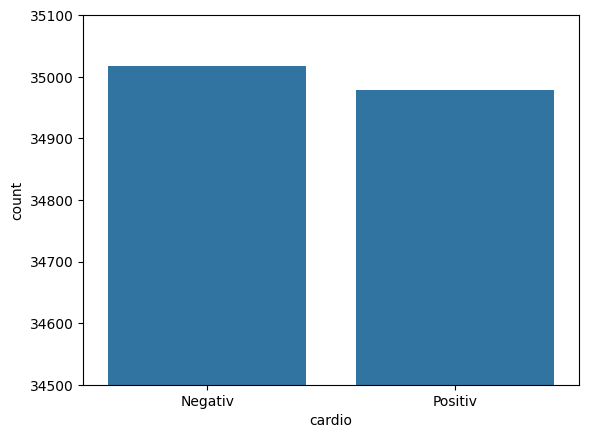

In [46]:
sns.barplot(data= cardio_counts, x= "cardio", y= "count")
plt.xticks(ticks=[0, 1], labels=['Negativ', 'Positiv'])
plt.ylim([34500, 35100])

## 2.B)

In [47]:
df_cardio = df_cardio[(df_cardio['ap_hi'] > 60) & (df_cardio['ap_hi'] < 160)]

([<matplotlib.patches.Wedge at 0x226eeb0f0d0>,
 [Text(-0.751521110850552, -0.803253397095806, 'normal'),
  Text(0.9787315963381296, 0.5020801353662748, 'higher then normal'),
  Text(0.3716778713974049, 1.0353045735016795, 'much higher then normal')],
 [Text(-0.40992060591848284, -0.4381382165977123, '76.1%'),
  Text(0.533853598002616, 0.27386189201796807, '13.0%'),
  Text(0.20273338439858446, 0.5647115855463706, '11.0%')])

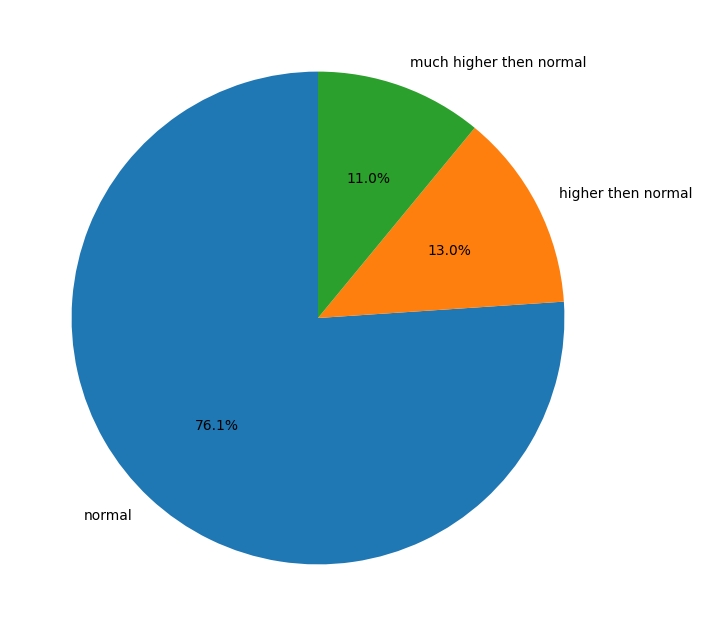

In [53]:
cholesterol_count= df_cardio["cholesterol"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cholesterol_count, labels= ["normal", "higher then normal", "much higher then normal"], autopct= '%1.1f%%', startangle= 90)

## 2.C)


<Axes: xlabel='age', ylabel='Count'>

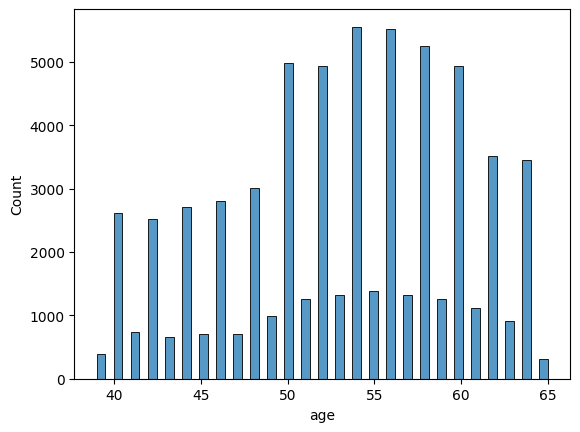

In [ ]:
sns.histplot(data= df_cardio, x= "age")

## 2.D)

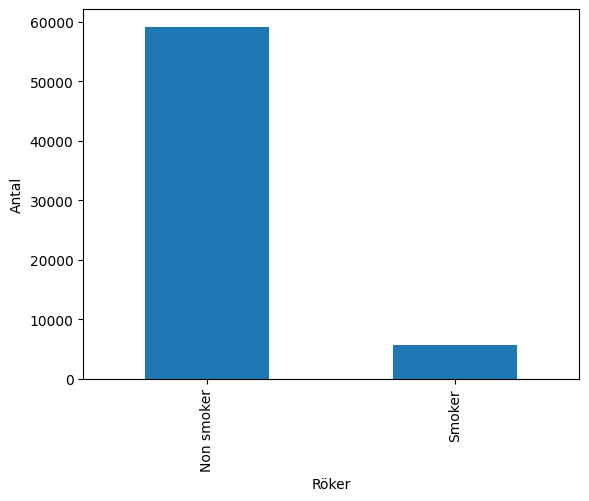

In [ ]:
"""plotting smokers vs non smokers"""
smoker= df_cardio["smoke"].value_counts()

smoker.plot(kind= "bar")
plt.xlabel('Röker')
plt.ylabel('Antal')
plt.xticks(range(len(smoker)), ['Non smoker', 'Smoker'])
plt.show()

## 2.E)

<Axes: xlabel='weight', ylabel='Count'>

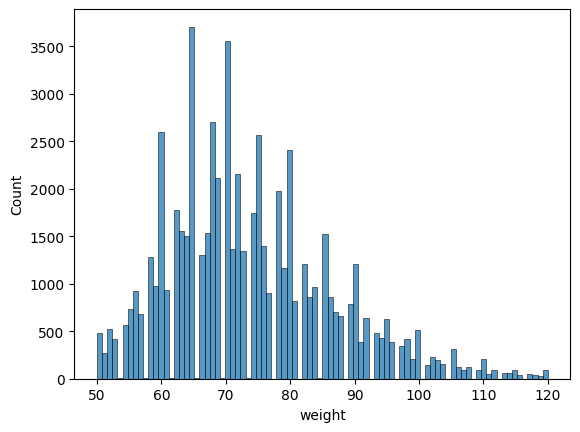

In [ ]:
"""Filtering weight"""
weight_filtered= df_cardio[(df_cardio["weight"] >= 50) & (df_cardio["weight"] <= 120)]

sns.histplot(data= weight_filtered, x="weight")

## 2.F)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


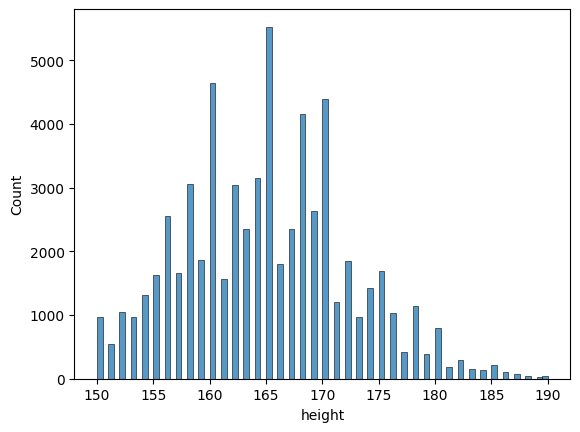

In [ ]:
"""same for height"""
height_filtered= df_cardio[(df_cardio["height"] >= 150) & (df_cardio["height"] <= 190)]

sns.histplot(data= height_filtered, x= "height")
height_filtered

## 2.G)

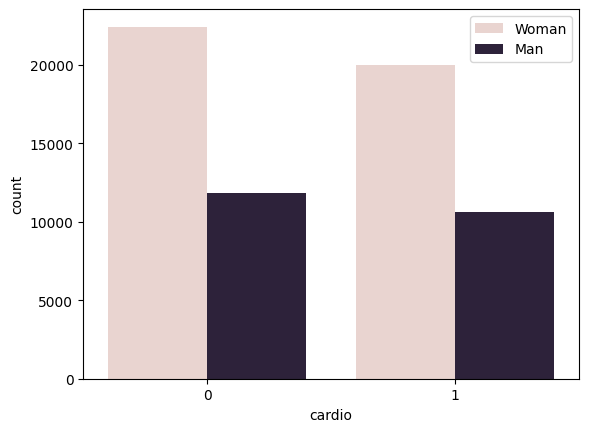

In [ ]:
sns.countplot(data= df_cardio, x= "cardio", hue= "gender")
handels= plt.gca().get_legend_handles_labels()[0]
labels= ["Woman", "Man"]
plt.legend(handles= handels, labels= labels)

## 2.1)

In [ ]:
df_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df_cardio["BMI"]= (df_cardio["weight"] / (df_cardio["height"] / 100)**2).round()

C:\Users\milto\AppData\Local\Temp\ipykernel_22940\3583212387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cardio["BMI"]= (df_cardio["weight"] / (df_cardio["height"] / 100)**2).round()


In [ ]:
df_cardio.sort_values(by= "BMI", ascending= False)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
12770,18218,54,1,75,168.0,120,80,1,1,1,0,1,1,299.0
27384,39156,42,1,80,178.0,140,90,3,3,0,0,1,1,278.0
22723,32456,64,1,55,81.0,130,90,1,1,0,0,1,1,268.0
23913,34186,52,1,81,156.0,140,90,1,1,0,0,1,0,238.0
29157,41661,52,1,60,69.0,110,70,1,1,0,0,0,0,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60699,86650,52,1,171,29.0,110,70,2,1,0,0,1,1,10.0
26806,38312,64,1,157,23.0,110,80,1,1,0,0,1,0,9.0
60188,85931,60,1,162,21.0,120,80,2,1,0,0,1,1,8.0
29488,42156,56,2,177,22.0,120,80,1,1,1,1,1,0,7.0


### Jag tar från vad jag kan hitta 12 och 43, under och över är orimligt. Kan hända men extremt sällsynt. Tyckte att de var extrema värden så ger och tar lite

In [ ]:
mask= (df_cardio["BMI"] > 17.5) & (df_cardio["BMI"] < 43)
df_cardio= df_cardio.loc[mask]

In [ ]:
df_cardio.sort_values(by= "BMI", ascending= False)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
22722,32455,56,1,161,108.0,140,80,3,1,0,0,1,0,42.0
13491,19261,62,1,160,108.0,120,80,1,1,0,0,1,1,42.0
11304,16167,55,1,157,103.0,140,90,1,1,0,0,1,0,42.0
17491,24994,48,2,166,117.0,150,90,2,2,0,0,1,1,42.0
47676,68071,56,1,153,98.0,140,90,3,1,0,0,1,1,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58346,83265,62,1,160,45.0,110,80,1,1,0,0,0,1,18.0
17416,24882,40,2,165,48.0,120,80,1,1,0,0,1,0,18.0
38411,54844,54,1,168,51.0,120,80,1,1,0,0,0,0,18.0
52339,74649,40,1,152,41.0,120,80,1,1,0,0,0,0,18.0


normal range, overweight, obese (class I), obese
(class II), obese (class III)

In [ ]:
conditions=[
    (df_cardio["BMI"] < 18.5),
    (df_cardio["BMI"] >= 18.5) & (df_cardio["BMI"] < 25),
    (df_cardio["BMI"] >= 25) & (df_cardio["BMI"] < 30),
    (df_cardio["BMI"] >= 30) & (df_cardio["BMI"] < 35),
    (df_cardio["BMI"] >= 35) & (df_cardio["BMI"] < 40),
    (df_cardio["BMI"] >= 40)
]
categories=["Under", "Normal", "Over", "Obesity_1", "Obesity_2", "Obesity_3"]

df_cardio["BMI_class"]= np.select(conditions, categories)

C:\Users\milto\AppData\Local\Temp\ipykernel_22940\324130525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cardio["BMI_class"]= np.select(conditions, categories)


<Axes: xlabel='BMI', ylabel='Count'>

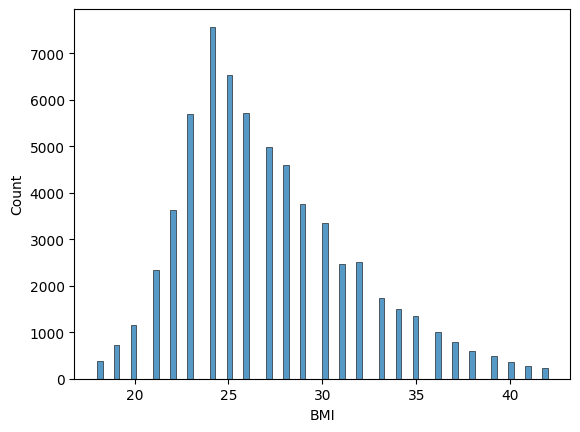

In [ ]:
sns.histplot(data= df_cardio, x= "BMI")

## 2.1.1)

### Kategorier från länk i uppgiften

In [ ]:
df_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_class
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,35.0,Obesity_2
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,24.0,Normal
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,29.0,Over
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,54,1,172,70.0,130,90,1,1,0,0,1,1,24.0,Normal
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1,29.0,Over
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,27.0,Over
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.0,Over


## 2.2)


In [ ]:
bmi_cardio= df_cardio.groupby("BMI_class")["cardio"].value_counts().reset_index(name= "count")
bmi_cardio

,BMI_class,cardio,count
0,Normal,0,13197
1,Normal,1,7921
2,Obesity_1,1,6527
3,Obesity_1,0,5042
4,Obesity_2,1,2696
5,Obesity_2,0,1529
6,Obesity_3,1,596
7,Obesity_3,0,265
8,Over,0,13430
9,Over,1,12161


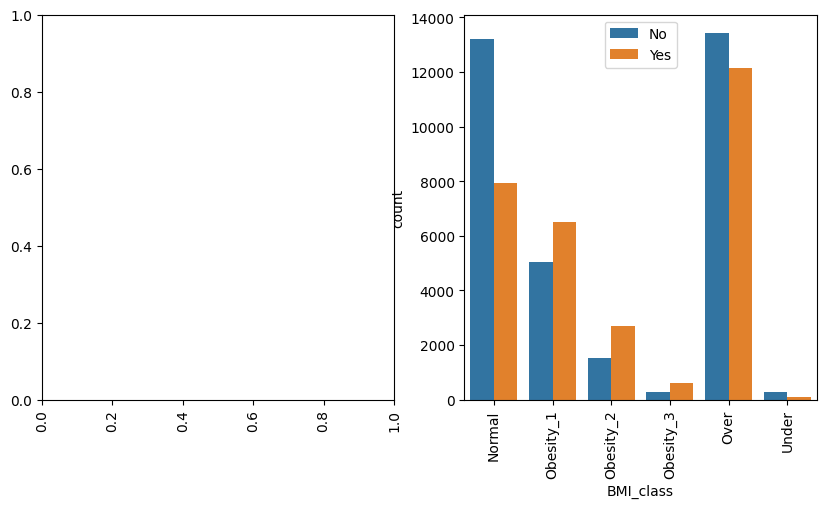

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(
    
)

sns.barplot(
    data=bmi_cardio,
    x="BMI_class",
    y="count",
    hue="cardio",
    ax= ax[1],
)
ax[0].tick_params(axis= "x", rotation= 90)
ax[1].legend(handles= ax[1].get_legend_handles_labels()[0], labels= ["No", "Yes"])
ax[1].tick_params(axis= "x", rotation= 90)
plt.show()

## 2.2.1

In [ ]:
cardio_no_bmi_calss= df_cardio.drop(columns= "BMI_class")
cardio_no_bmi_calss

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,35.0
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,24.0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,29.0
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,54,1,172,70.0,130,90,1,1,0,0,1,1,24.0
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1,29.0
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,27.0
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.0


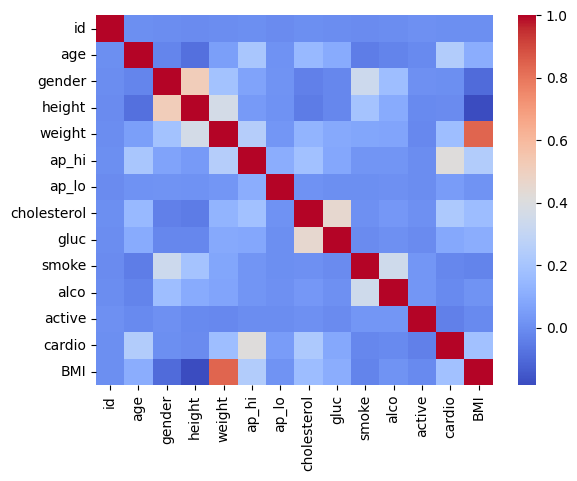

In [ ]:
correlation_matrix = cardio_no_bmi_calss.corr()

sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.show()

Skulle tro att height och gender kan vara kopplade eftersom män i regel är längre än vad kvinnor är, så den har kopplat ihop dessa features

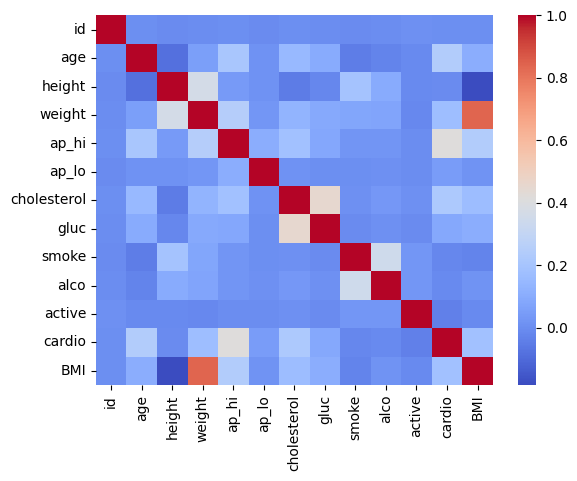

In [ ]:
cardio_no_gender_bmi_class= df_cardio.drop(columns= ["gender", "BMI_class"])
correlation_matrix = cardio_no_gender_bmi_class.corr()

sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.show()

## 2.3

In [ ]:
x, y= cardio_no_gender_bmi_class.drop("cardio", axis= "columns"), cardio_no_gender_bmi_class["cardio"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state= 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
standard_scaler= StandardScaler()
normalize_scaler= MinMaxScaler()

standard_X_train= standard_scaler.fit_transform(X_train)
standard_X_test= standard_scaler.transform(X_test)
normalize_X_train= normalize_scaler.fit_transform(X_train)
normalize_X_test= normalize_scaler.transform(X_test)